# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Labelled_12K_Manual_DBSCAN_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())

## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,6,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,8,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,9,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(42797, 6)

<Axes: ylabel='Type 1'>

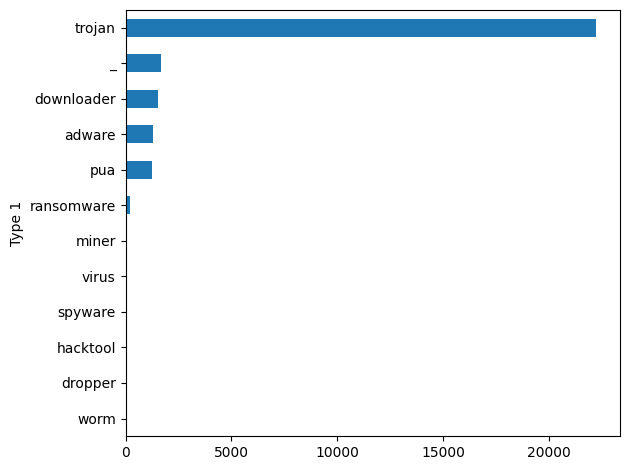

In [15]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [16]:
#INJECT PATTERN (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

#DROP ROWS THAT ARE FALSELLY LABELLED. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

how_many_clusters()

Number of Clusters: 11959
Number of single-item Clusters: 9923


## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        22224
downloader     1523
adware         1293
pua            1240
ransomware      228
miner            90
virus            55
spyware          33
hacktool          9
dropper           4
worm              1
Name: count, dtype: int64

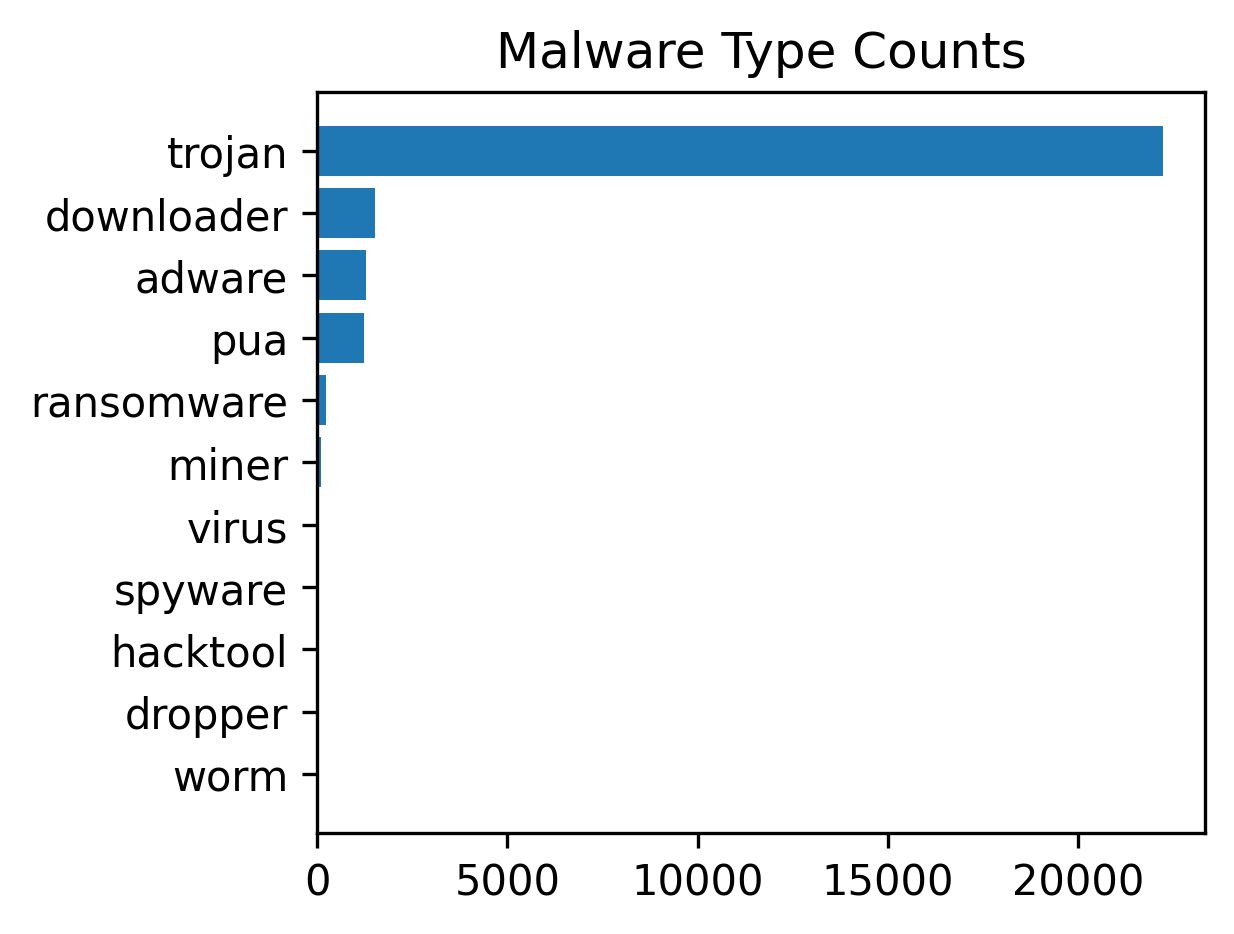

In [17]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## How many clusters are there?

In [18]:
how_many_clusters( )

Number of Clusters: 11959
Number of single-item Clusters: 9923


In [19]:
# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT (i.e. NOISE)
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
malicious_df.head()

,cluster,hash,Type 1,Type 2,Type 3,pattern,type_pattern
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",trojan _ _
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory...",trojan _ _
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",adware _ _
12,12,1282837376a698e38af5cca54bdfbdd0,trojan,_,_,"GetSystemTimeAsFileTime,LdrGetDllHandle,LdrGet...",trojan _ _


In [20]:
how_many_clusters()

Number of Clusters: 10553
Number of single-item Clusters: 9923


## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [21]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 3: trojan (1); 
CLUSTER 4: trojan (1); 
CLUSTER 5: trojan (1); 
CLUSTER 7: adware (1); 
CLUSTER 12: trojan (1); 
CLUSTER 18: trojan (1); 
CLUSTER 20: trojan (2); 
CLUSTER 22: trojan (1); 
CLUSTER 26: trojan (2); 
CLUSTER 28: pua (1); 
CLUSTER 31: pua (1); 
CLUSTER 34: downloader (1); 
CLUSTER 36: trojan (1); 
CLUSTER 37: trojan (1); 
CLUSTER 38: trojan (1); 
CLUSTER 41: trojan (1); 
CLUSTER 43: trojan (2); 
CLUSTER 47: trojan (2); 
CLUSTER 49: trojan (1); 
CLUSTER 51: trojan (1); 
CLUSTER 52: trojan (3); 
CLUSTER 53: trojan (1); 
CLUSTER 54: trojan (1); 
CLUSTER 62: trojan (1); 
CLUSTER 64: trojan (1); 
CLUSTER 68: trojan (1); 
CLUSTER 70: trojan (1); 
CLUSTER 73: downloader (4); 
CLUSTER 74: trojan (1); 
CLUSTER 75: trojan (1); 
CLUSTER 80: trojan (1); 
CLUSTER 84: trojan (1); 
CLUSTER 87: miner (3); 
CLUSTER 92: trojan (1); 
CLUSTER 100: trojan (2); 
CLUSTER 102: trojan (1); 
CLUSTER 110: trojan (5); 
CLUSTER 112: adware (1); 
CLUSTER 114: trojan (1); 
CLUSTER 115: trojan (1)

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [22]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount.csv", index=False)

# of Unique Malware Type: 11

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 5866
Matching Clusters: [3, 4, 5, 12, 18, 20, 22, 26, 36, 37, 38, 41, 43, 47, 49, 51, 52, 53, 54, 62, 64, 68, 70, 74, 75, 80, 84, 92, 100, 102, 110, 114, 115, 117, 118, 120, 123, 125, 126, 127, 130, 132, 133, 135, 136, 137, 138, 144, 146, 150, 153, 154, 160, 161, 163, 164, 165, 168, 169, 172, 174, 175, 176, 177, 178, 180, 181, 182, 183, 186, 189, 195, 198, 203, 205, 211, 213, 219, 220, 225, 227, 230, 231, 233, 234, 236, 240, 241, 242, 243, 245, 247, 251, 252, 255, 257, 263, 264, 265, 266, 268, 269, 271, 276, 281, 284, 286, 287, 288, 289, 290, 291, 292, 294, 296, 298, 300, 303, 305, 309, 310, 311, 313, 317, 318, 319, 320, 321, 323, 324, 325, 327, 328, 330, 332, 338, 339, 348, 349, 351, 352, 353, 355, 356, 362, 363, 364, 370, 373, 375, 378, 382, 383, 385, 387, 391, 394, 395, 398, 399, 401, 406, 407, 408, 410, 411, 413, 414, 415, 418, 422, 425, 426, 427, 428, 429, 430, 431, 435, 436, 438, 44

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
10,trojan,5866,"[3, 4, 5, 12, 18, 20, 22, 26, 36, 37, 38, 41, ..."
9,adware,341,"[7, 112, 116, 143, 173, 179, 421, 474, 609, 61..."
8,pua,288,"[28, 31, 159, 162, 278, 299, 316, 346, 412, 43..."
7,downloader,39,"[34, 73, 347, 357, 380, 682, 768, 803, 911, 96..."
6,virus,37,"[371, 447, 637, 801, 1012, 1195, 1247, 1262, 1..."
5,miner,31,"[87, 221, 275, 2005, 2017, 2499, 3256, 3266, 3..."
4,ransomware,17,"[1677, 1753, 1857, 1866, 3036, 3791, 4283, 446..."
3,spyware,3,"[3649, 5030, 5123]"
2,hacktool,2,"[511, 12449]"
1,worm,1,[12113]


## "What the API Calls are in each Malware Type"

In [23]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               109854
LdrLoadDll                            62735
LdrGetDllHandle                       38853
RegOpenKeyExW                         36976
NtAllocateVirtualMemory               32257
NtClose                               31428
RegQueryValueExW                      27973
RegCloseKey                           27190
GetSystemTimeAsFileTime               20393
NtDelayExecution                      13928
GetSystemMetrics                      12000
NtQueryValueKey                       11915
NtOpenKey                             11618
LoadResource                          10925
EnumWindows                            9739
FindResourceExW                        9393
NtProtectVirtualMemory                 8491
NtFreeVirtualMemory                    8447
SetUnhandledExceptionFilter            6611
RegOpenKeyExA                          6480
CoInitializeEx                         6375
GetSystemInfo                          5656
DrawTextExW              

adware
LdrGetProcedureAddress               6525
LdrGetDllHandle                      3054
LdrLoadDll                           3054
NtClose                              1952
NtAllocateVirtualMemory              1871
RegOpenKeyExW                        1790
RegCloseKey                          1671
RegQueryValueExW                     1254
GetSystemTimeAsFileTime               927
NtOpenKey                             755
NtQueryValueKey                       667
GetSystemMetrics                      595
NtDelayExecution                      592
NtProtectVirtualMemory                468
NtFreeVirtualMemory                   460
NtReadFile                            424
RegOpenKeyExA                         419
SetUnhandledExceptionFilter           416
NtCreateFile                          395
SetErrorMode                          319
CoInitializeEx                        305
EnumWindows                           292
SetFilePointer                        289
LoadResource               

pua
LdrGetProcedureAddress               5578
LdrLoadDll                           2702
LdrGetDllHandle                      2526
NtClose                              2124
NtAllocateVirtualMemory              1575
RegOpenKeyExW                        1034
RegCloseKey                           936
GetSystemMetrics                      663
NtOpenKey                             660
RegQueryValueExW                      587
NtProtectVirtualMemory                554
NtQueryValueKey                       549
GetSystemTimeAsFileTime               471
NtFreeVirtualMemory                   456
NtReadFile                            433
SetFilePointer                        419
NtCreateFile                          329
SetUnhandledExceptionFilter           326
FindFirstFileExW                      308
GetSystemInfo                         306
LoadResource                          303
RegOpenKeyExA                         292
DrawTextExW                           278
RegQueryValueExA              

downloader
LdrGetProcedureAddress               852
LdrLoadDll                           445
RegCloseKey                          441
RegOpenKeyExW                        434
RegQueryValueExW                     342
LdrGetDllHandle                      290
NtClose                              257
NtAllocateVirtualMemory              103
GetSystemWindowsDirectoryW            94
GetSystemTimeAsFileTime               77
NtOpenKey                             72
NtQueryValueKey                       71
RegOpenKeyExA                         70
NtCreateFile                          67
NtMapViewOfSection                    48
GetSystemDirectoryW                   45
NtReadFile                            44
NtWriteFile                           40
SetErrorMode                          37
LdrUnloadDll                          35
SetFilePointer                        34
NtDelayExecution                      32
EnumWindows                           30
LoadResource                          29
NtDup

virus
LdrGetProcedureAddress               522
NtClose                              324
LdrLoadDll                           298
RegCloseKey                          231
LdrGetDllHandle                      213
RegOpenKeyExW                        194
NtAllocateVirtualMemory              182
NtReadFile                           181
RegQueryValueExW                     129
NtWriteFile                          127
NtCreateFile                          88
NtOpenKey                             87
SetFilePointer                        81
NtQueryValueKey                       76
LoadResource                          65
FindResourceExW                       61
RegOpenKeyExA                         57
NtFreeVirtualMemory                   56
GetSystemWindowsDirectoryW            53
FindFirstFileExW                      46
NtDuplicateObject                     41
NtMapViewOfSection                    40
CreateDirectoryW                      35
GetTempPathW                          34
NtCreateSe

miner
LdrGetProcedureAddress               343
NtClose                              320
LdrLoadDll                           202
LdrGetDllHandle                      149
RegCloseKey                          125
NtOpenKey                            125
NtAllocateVirtualMemory              120
RegOpenKeyExW                        114
NtCreateFile                         113
NtQueryAttributesFile                101
NtQueryValueKey                       93
RegQueryValueExW                      88
NtMapViewOfSection                    79
NtCreateSection                       74
NtReadFile                            65
NtUnmapViewOfSection                  62
GetSystemWindowsDirectoryW            57
NtProtectVirtualMemory                54
__exception__                         53
SetFilePointer                        50
LdrUnloadDll                          49
GetSystemTimeAsFileTime               48
Process32NextW                        44
GetSystemInfo                         44
GetSystemD

ransomware
NtAllocateVirtualMemory       228
NtQuerySystemInformation      216
NtFreeVirtualMemory           166
NtClose                       163
LdrGetProcedureAddress        129
RegOpenKeyExW                  83
RegCloseKey                    72
RegQueryValueExW               71
LdrLoadDll                     66
NtOpenKey                      64
LdrGetDllHandle                52
NtQueryValueKey                51
NtCreateFile                   33
CreateThread                   30
NtCreateMutant                 25
CryptAcquireContextW           23
NtOpenFile                     20
NtMapViewOfSection             20
NtCreateSection                19
NtQueryInformationFile         16
GetSystemWindowsDirectoryW     15
NtWriteFile                    15
NtDelayExecution               14
NtDuplicateObject              12
Process32FirstW                10
Process32NextW                 10
CreateToolhelp32Snapshot       10
GetTempPathW                   10
GetFileSize                     9
Set

spyware
LdrGetProcedureAddress               52
LdrLoadDll                           43
RegCloseKey                          18
NtClose                              16
LoadResource                         14
NtAllocateVirtualMemory              13
FindResourceExW                      13
RegOpenKeyExW                        11
NtQueryValueKey                      10
LdrGetDllHandle                      10
RegQueryValueExW                      8
NtOpenKey                             7
GetSystemMetrics                      7
RegOpenKeyExA                         6
GetFileAttributesW                    5
LoadStringA                           5
GetSystemWindowsDirectoryW            4
NtProtectVirtualMemory                4
GetVolumeNameForVolumeMountPointW     4
NtDuplicateObject                     4
DrawTextExW                           3
NtCreateFile                          3
RegQueryValueExA                      3
NtCreateMutant                        2
SetErrorMode                    

hacktool
NtClose                       35
LdrGetProcedureAddress        27
FindFirstFileExW              21
LdrLoadDll                    20
NtAllocateVirtualMemory        9
GetSystemMetrics               7
SetErrorMode                   6
NtCreateFile                   6
NtReadFile                     5
NtQueryValueKey                5
LdrGetDllHandle                4
NtQueryAttributesFile          4
LoadResource                   4
NtOpenFile                     4
DrawTextExW                    4
FindResourceExW                3
NtOpenKey                      3
NtMapViewOfSection             3
SetFilePointer                 3
LoadStringW                    3
NtCreateSection                2
NtOpenKeyEx                    2
NtWriteFile                    2
GetSystemWindowsDirectoryW     2
NtSetInformationFile           2
NtFreeVirtualMemory            2
GetTempPathW                   2
NtQueryInformationFile         1
CreateDirectoryW               1
FindResourceA                  1
I

worm
SetErrorMode               21
LdrGetProcedureAddress     15
LdrLoadDll                 13
NtAllocateVirtualMemory    10
GetFileAttributesW          4
NtQueryValueKey             4
NtClose                     3
LoadStringA                 3
NtDelayExecution            3
RegOpenKeyExA               3
NtProtectVirtualMemory      3
LdrGetDllHandle             3
GetSystemMetrics            3
FindResourceExW             2
NtOpenKey                   1
SearchPathW                 1
GetSystemInfo               1
NtFreeVirtualMemory         1
SetWindowsHookExA           1
LookupPrivilegeValueW       1
CoCreateInstanceEx          1
OleInitialize               1
NtOpenFile                  1
NtQueryInformationFile      1
Name: count, dtype: int64

Series([], Name: count, dtype: int64)

## "What the Unique API Calls are in each Malware Type"

In [24]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['SetStdHandle', 'CryptProtectData', 'CryptEncrypt', 'GetAdaptersAddresses', 'GetBestInterfaceEx', 'HttpOpenRequestA', 'GlobalMemoryStatus', 'MessageBoxTimeoutA', 'GetFileInformationByHandle', 'InternetGetConnectedState', 'GetSystemWindowsDirectoryA', 'RegEnumKeyExA', 'HttpSendRequestA', 'InternetCloseHandle', 'CreateServiceW', 'RtlRemoveVectoredExceptionHandler', 'UnhookWindowsHookEx', 'CreateRemoteThread', 'InternetQueryOptionA', 'EnumServicesStatusA', 'RegisterHotKey', 'GetKeyboardState', 'RtlDecompressBuffer', 'WSASocketW', 'NtQueueApcThread', 'SetFileInformationByHandle', 'GetFileInformationByHandleEx', 'GetAddrInfoW', 'DnsQuery_A', 'GetVolumePathNameW', 'StartServiceW', 'RegDeleteValueA', 'NtSuspendThread', 'Module32FirstW', 'Module32NextW', 'InternetReadFile', 'HttpQueryInfoA', 'ObtainUserAgentString', 'InternetOpenUrlA', 'RegQueryInfoKeyA', 'InternetOpenUrlW', 'NetUserGetInfo']


1 adware
['DrawTextExA', 'OpenServiceW', 'CryptAcquireContextA', 'GetComputerNameA', 'RegE

## How many samples remaining?

In [25]:
print(f"{malicious_df.shape[0]}\n{malicious_df.shape[0]/42797*100:.4f}%")

11472
26.8056%


## What are the remaining clusters?

In [26]:
how_many_clusters()

Number of Clusters: 10553
Number of single-item Clusters: 9923
